In [ ]:
Import Libararies

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [21]:
!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 108.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 46.6 MB/s eta 0:00:00


Set Working Directory

In [1]:
import os

cwd = os.getcwd()
print("Current working directory:", cwd)


Current working directory: /workspace/project5_cherryleaves/jupyter_notebooks


In [7]:
work_dir = os.getcwd()
work_dir

'/workspace/project5_cherryleaves/jupyter_notebooks'

Set Input Directory

In [2]:
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = my_data_dir + 'train'
val_path = my_data_dir + 'validation'
test_path = my_data_dir + 'test'


Set Output Directory 

In [3]:
import os

# Define input directories
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

# Define output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/'

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Optionally, define version-specific output directory
version = 'v1'
version_output_dir = os.path.join(output_dir, version)

# Create version-specific output directory if it doesn't exist
if not os.path.exists(version_output_dir):
    os.makedirs(version_output_dir)


In [ ]:
Set label Names

In [4]:
import os

# Assuming train_path is already defined earlier
labels = os.listdir(train_path)
print('Labels for the images are:', labels)


Labels for the images are: ['healthy', 'powdery_mildew']


Data visualisation of image data

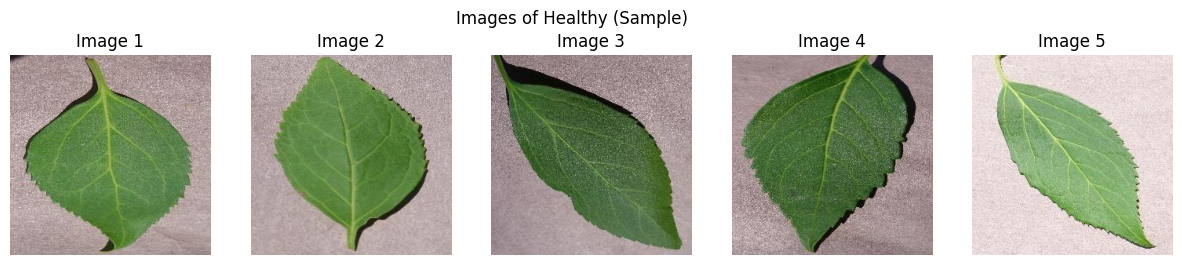

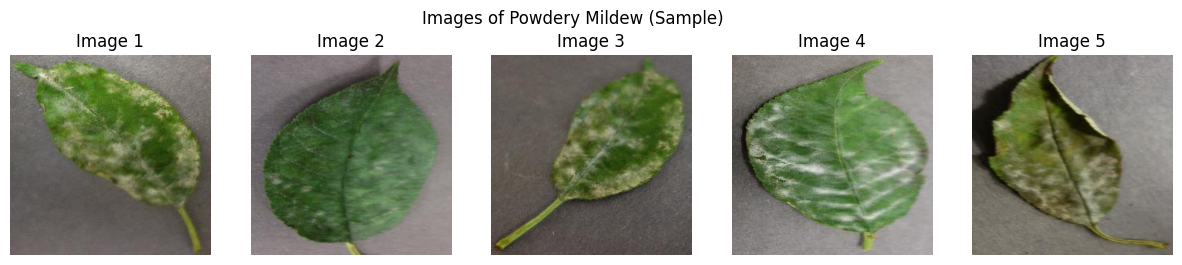

In [6]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/train'

# Function to visualize images in a directory and save them
def visualize_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return
    
    # Create output directory for the label if it doesn't exist
    output_label_dir = os.path.join(output_dir, label)
    os.makedirs(output_label_dir, exist_ok=True)
    
    # Plot the images
    num_images = min(len(image_files), 5)  # Limit to maximum 5 images for visualization
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    fig.suptitle(f'Images of {label} (Sample)')
    
    # Save and display the images
    for i in range(num_images):
        image_filename = f'image_{i+1}.jpg'  # Save as JPEG
        image_path = os.path.join(directory, image_files[i])
        image = imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
        
        # Save the image
        output_image_path = os.path.join(output_label_dir, image_filename)
        plt.imsave(output_image_path, image, format='jpg')

    plt.show()

# Visualize and save images in the 'healthy' directory
visualize_images(healthy_dir, 'Healthy')

# Visualize and save images in the 'powdery_mildew' directory
visualize_images(powdery_mildew_dir, 'Powdery Mildew')



Image shape
Compute average images' size on train set

In [7]:
import os
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
import json

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to visualize images in a directory and compute average image size
def visualize_and_compute_avg_size(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Check if there are any images in the directory
    if not image_files:
        print(f"No images found in directory: {directory}")
        return None
    
    # Compute image shape average
    dim1, dim2 = [], []
    for image_filename in image_files:
        image_path = os.path.join(directory, image_filename)
        img = imread(image_path)
        d1, d2, _ = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width
    
    # Compute average image size
    avg_size = (int(np.mean(dim1)), int(np.mean(dim2)))
    print(f"Average image size in {label} set: {avg_size}")
    return avg_size

# Compute average image size for 'healthy' images
avg_size_healthy = visualize_and_compute_avg_size(healthy_dir, 'Healthy')

# Compute average image size for 'powdery_mildew' images
avg_size_powdery_mildew = visualize_and_compute_avg_size(powdery_mildew_dir, 'Powdery Mildew')

# Save computed data to a JSON file
computed_data = {
    'healthy': avg_size_healthy,
    'powdery_mildew': avg_size_powdery_mildew
}

output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'
output_file = os.path.join(output_dir, 'computed_data.json')

with open(output_file, 'w') as f:
    json.dump(computed_data, f)

print(f"Computed data saved to {output_file}")


Average image size in Healthy set: (256, 256)
Average image size in Powdery Mildew set: (256, 256)
Computed data saved to /workspace/project5_cherryleaves/jupyter_notebooks/outputs/computed_data.json


Average and variability of images per label
Function to load images in an array (tensor)

In [6]:
import os
import json
import numpy as np
from skimage.io import imread
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to compute image shape average and standard deviation
def compute_image_shape(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Get image shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    shapes = np.array(shapes)
    if len(shapes) > 0:
        mean_shape = np.mean(shapes, axis=0)
        std_shape = np.std(shapes, axis=0)
    else:
        mean_shape = np.nan
        std_shape = np.nan
    
    return mean_shape, std_shape

# Compute image shapes for healthy and powdery mildew sets
avg_healthy_shape, std_healthy_shape = compute_image_shape(healthy_dir)
avg_powdery_mildew_shape, std_powdery_mildew_shape = compute_image_shape(powdery_mildew_dir)

# Save computed data
computed_data = {
    'healthy': {
        'average_shape': avg_healthy_shape.tolist() if np.isnan(avg_healthy_shape).any() else None,
        'std_shape': std_healthy_shape.tolist() if np.isnan(std_healthy_shape).any() else None
    },
    'powdery_mildew': {
        'average_shape': avg_powdery_mildew_shape.tolist() if np.isnan(avg_powdery_mildew_shape).any() else None,
        'std_shape': std_powdery_mildew_shape.tolist() if np.isnan(std_powdery_mildew_shape).any() else None
    }
}


computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print average image sizes
if np.isnan(avg_healthy_shape).any():
    print("No images found in Healthy set.")
else:
    print(f"Average image size in Healthy set: ({avg_healthy_shape[0]:.0f}, {avg_healthy_shape[1]:.0f}) with std deviation: ({std_healthy_shape[0]:.2f}, {std_healthy_shape[1]:.2f})")

if np.isnan(avg_powdery_mildew_shape).any():
    print("No images found in Powdery Mildew set.")
else:
    print(f"Average image size in Powdery Mildew set: ({avg_powdery_mildew_shape[0]:.0f}, {avg_powdery_mildew_shape[1]:.0f}) with std deviation: ({std_powdery_mildew_shape[0]:.2f}, {std_powdery_mildew_shape[1]:.2f})")




Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG, shape: (256, 256, 3)
Loaded image: 00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_1

Load image shape and labels in array

In [7]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to load images and extract their shapes and labels
def load_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images, extract shapes, and assign labels
    shapes = []
    labels = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        labels.append(label)
        print(f"Loaded image: {image_file}, shape: {img_array.shape}, label: {label}")
    
    return shapes, labels

# Load images and extract shapes and labels for healthy and powdery mildew sets
healthy_shapes, healthy_labels = load_images(healthy_dir, 0)
powdery_mildew_shapes, powdery_mildew_labels = load_images(powdery_mildew_dir, 1)

# Combine shapes and labels into arrays
all_shapes = np.concatenate((healthy_shapes, powdery_mildew_shapes), axis=0)
all_labels = np.concatenate((healthy_labels, powdery_mildew_labels), axis=0)

# Save computed data
computed_data = {
    'healthy': len(healthy_shapes),
    'powdery_mildew': len(powdery_mildew_shapes)
}

computed_data_path = os.path.join(output_dir, 'computed_data.json')
with open(computed_data_path, 'w') as f:
    json.dump(computed_data, f)

# Print shapes and labels
print("Shapes:", all_shapes)
print("Labels:", all_labels)

print(f"Computed data saved to {computed_data_path}")


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.J

In [ ]:
Plot and save mean and variability of images per label

Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG, shape: (256, 256, 3), label: 0
Loaded image: 005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3), label: 0
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG, shape: (256, 256, 3), label: 0
Loaded image: 00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.J

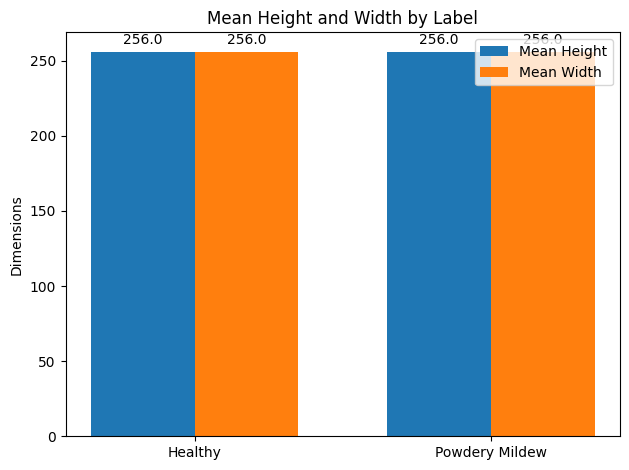

In [8]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Define the output directory
output_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs'

# Function to load images and extract their shapes and labels
def load_images(directory, label):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images, extract shapes, and assign labels
    shapes = []
    labels = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        labels.append(label)
        print(f"Loaded image: {image_file}, shape: {img_array.shape}, label: {label}")
    
    return shapes, labels

# Load images and extract shapes and labels for healthy and powdery mildew sets
healthy_shapes, _ = load_images(healthy_dir, 0)
powdery_mildew_shapes, _ = load_images(powdery_mildew_dir, 1)

# Calculate mean and std deviation of image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)
healthy_std_shape = np.std(healthy_shapes, axis=0)
powdery_mildew_std_shape = np.std(powdery_mildew_shapes, axis=0)

# Plot and save mean and std deviation
labels = ['Healthy', 'Powdery Mildew']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [healthy_mean_shape[0], powdery_mildew_mean_shape[0]], width, label='Mean Height')
rects2 = ax.bar(x + width/2, [healthy_mean_shape[1], powdery_mildew_mean_shape[1]], width, label='Mean Width')

ax.set_ylabel('Dimensions')
ax.set_title('Mean Height and Width by Label')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig(os.path.join(output_dir, 'mean_dimensions_per_label.png'))
plt.show()


In [ ]:
Difference between average parasite-contained and average uninfected cell images

In [10]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to load images and extract their shapes
def load_images(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    
    # Load images and extract shapes
    shapes = []
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path)
        img_array = image.img_to_array(img)
        shapes.append(img_array.shape[:2])  # Extract height and width
        print(f"Loaded image: {image_file}, shape: {img_array.shape}")
    
    return shapes

# Load images and extract shapes for healthy and powdery mildew sets
healthy_shapes = load_images(healthy_dir)
powdery_mildew_shapes = load_images(powdery_mildew_dir)

# Calculate mean image shapes for each label
healthy_mean_shape = np.mean(healthy_shapes, axis=0)
powdery_mildew_mean_shape = np.mean(powdery_mildew_shapes, axis=0)

# Calculate the difference between the average healthy and average powdery mildew images
difference = powdery_mildew_mean_shape - healthy_mean_shape

print("Difference between average powdery mildew and average healthy images:")
print(f"Height difference: {difference[0]:.2f}")
print(f"Width difference: {difference[1]:.2f}")


Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (256, 256, 3)
Loaded image: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG, shape: (256, 256, 3)
Loaded image: 005f183c-0a73-4738-91f7-c0a0e02cd9e3___JR_HL 9679.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG, shape: (256, 256, 3)
Loaded image: 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG, shape: (256, 256, 3)
Loaded image: 00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG, shape: (256, 256, 3)
Loaded image: 011f07d1-8813-4a63-99c7-e274ab5cc261___JR_HL 4165_1

In [ ]:
Image Montage with labels

Loaded and resized image 1/5: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG, shape: (100, 100)
Loaded and resized image 2/5: 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG, shape: (100, 100)
Loaded and resized image 3/5: 002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG, shape: (100, 100)
Loaded and resized image 4/5: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG, shape: (100, 100)
Loaded and resized image 5/5: 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG, shape: (100, 100)
Loaded and resized image 1/5: 00705aa7-5ea2-4419-9440-8ba65e108eb9___FREC_Pwd.M 0267.JPG, shape: (100, 100)
Loaded and resized image 2/5: 00705aa7-5ea2-4419-9440-8ba65e108eb9___FREC_Pwd.M 0267_flipLR.JPG, shape: (100, 100)
Loaded and resized image 3/5: 00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG, shape: (100, 100)
Loaded and resized image 4/5: 00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748_flipLR.JPG, shape: (100, 100)
Loaded and resized

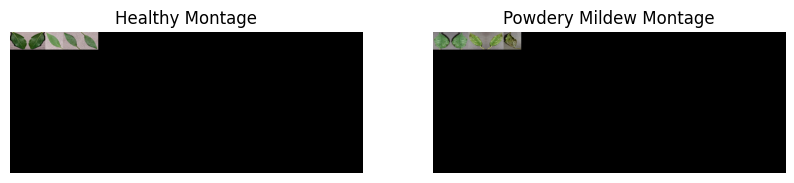

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

# Define the paths to the directories containing images
healthy_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/healthy'
powdery_mildew_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs/train/powdery_mildew'

# Function to load images and resize them
def load_and_resize_images(directory, num_images=5, target_size=(100, 100)):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]
    num_images = min(num_images, len(image_files))
    
    # Load and resize images
    images = []
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(directory, image_file)
        img = image.load_img(image_path, target_size=target_size)
        images.append(img)
        print(f"Loaded and resized image {i+1}/{num_images}: {image_file}, shape: {img.size}")
    
    return images

# Load and resize images for healthy and powdery mildew sets
healthy_images = load_and_resize_images(healthy_dir)
powdery_mildew_images = load_and_resize_images(powdery_mildew_dir)

# Function to create image montage
def create_image_montage(images, montage_shape=(2, 5), montage_size=(2000, 800)):
    montage = Image.new('RGB', montage_size)
    width, height = images[0].size
    x_offset = 0
    y_offset = 0
    for img in images:
        montage.paste(img, (x_offset, y_offset))
        x_offset += width
        if x_offset >= montage_size[0]:
            x_offset = 0
            y_offset += height
    return montage

# Create image montages for healthy and powdery mildew sets
healthy_montage = create_image_montage(healthy_images)
powdery_mildew_montage = create_image_montage(powdery_mildew_images)

# Display the image montages
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(healthy_montage)
plt.title('Healthy Montage')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(powdery_mildew_montage)
plt.title('Powdery Mildew Montage')
plt.axis('off')

plt.show()


In [1]:
! git status


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../README.md
	modified:   DataCollection.ipynb
	modified:   DataVisualization.ipynb
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/002efba9-09b3-43de-93b7-5c2460185cde___JR_HL 9655.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG
	deleted:    cherry-leaves/cherry-leaves/healthy/0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG
	deleted:    cherry-leaves/cherry-l

In [3]:
! git add . 